In [3]:
!pip install torch
!pip install kmeans-pytorch


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
#import os
#from google.colab import drive
#drive.mount('/content/drive')

#os.chdir('/content/drive/MyDrive/advanced_ml_final_project')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np

#embeddings = pd.read_pickle('/content/drive/MyDrive/advanced_ml_final_project/other_data/clean_2020articles_w_title_embeddings.pkl')
embeddings = pd.read_pickle('clean_2020articles_w_title_embeddings.pkl')

In [5]:
embeddings.rename(columns={"bert_sentence_embedding_title_only": "bert_embeddings"})
embeddings["bert_embeddings"] = embeddings["bert_sentence_embedding_title_only"].apply(lambda x: x.cpu())
embeddings["np_embeddings"] = embeddings["bert_embeddings"].apply(lambda x: x.numpy())

In [6]:
np_embeddings = np.vstack(embeddings["np_embeddings"])

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score # TODO read about these scoring mechanisms
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

def eval_cluster(embedding):
    y_pred = kmeans.fit_predict(embedding)

    # Evaluate the performance using ARI, NMI, and FMI
    ari = adjusted_rand_score(embeddings["target"], y_pred)
    nmi = normalized_mutual_info_score(embeddings["target"], y_pred)
    fmi = fowlkes_mallows_score(embeddings["target"], y_pred)

    # Print Metrics scores
    print("Adjusted Rand Index (ARI): {:.3f}".format(ari))
    print("Normalized Mutual Information (NMI): {:.3f}".format(nmi))
    print("Fowlkes-Mallows Index (FMI): {:.3f}".format(fmi))

def dimension_reduction(embedding, method):

    pca = PCA(n_components=2, random_state=42)

    pca_vecs = pca.fit_transform(embedding)

    # save our two dimensions into x0 and x1
    x0 = pca_vecs[:, 0]
    x1 = pca_vecs[:, 1]

    embeddings[f'x0_{method}'] = x0
    embeddings[f'x1_{method}'] = x1

def plot_pca(x0_name, x1_name, cluster_name, method):

    plt.figure(figsize=(12, 7))

    plt.title(f"Clustering with {method}", fontdict={"fontsize": 18})
    plt.xlabel("X0", fontdict={"fontsize": 16})
    plt.ylabel("X1", fontdict={"fontsize": 16})

    sns.scatterplot(data=embeddings, x=x0_name, y=x1_name, hue=cluster_name, palette="viridis")
    plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f1b556b5870>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_v

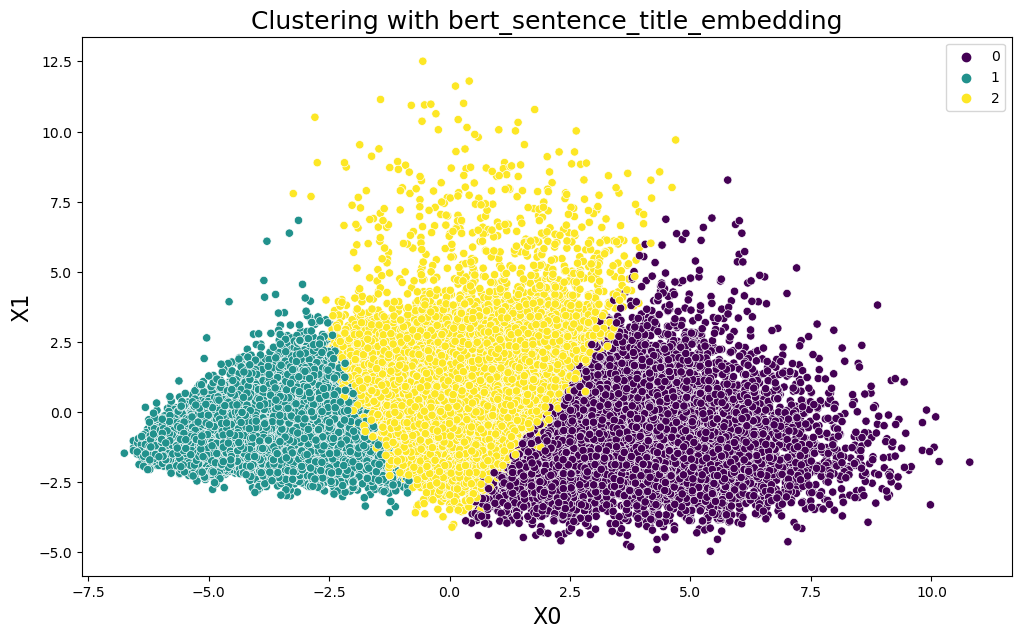

In [8]:
method = 'bert_sentence_title_embedding'
# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=3, random_state=42)

# fit the model
kmeans.fit(np_embeddings)

# store cluster labels in a variable
clusters = kmeans.labels_

# Assign clusters to our dataframe
clusters_result_name = f'cluster_bert_embeddings'
embeddings['bert_clusters'] = clusters

#eval_cluster(np_embeddings)

dimension_reduction(np_embeddings, method)

plot_pca(f'x0_{method}', f'x1_{method}', cluster_name=clusters, method=method)

In [9]:
k_values = [10,50,100,200]
for k in k_values:
    print("Creating kmeans with {} clusters".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42,max_iter=1000)
    kmeans.fit(np_embeddings)
    clusters = kmeans.labels_
    embeddings[f'cluster_{k}'] = clusters

Creating kmeans with 10 clusters


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f199d297010>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_v

Creating kmeans with 50 clusters


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f1b556b5f30>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_v

Creating kmeans with 100 clusters


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f1a602ffeb0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_v

Creating kmeans with 200 clusters


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f199d297010>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_v

In [10]:
count_clusters_k10 = embeddings.groupby("cluster_10").count().sort_values(by="title", ascending=False)["title"]
count_clusters_k50 = embeddings.groupby("cluster_50").count().sort_values(by="title", ascending=False)["title"]
count_clusters_k100 = embeddings.groupby("cluster_100").count().sort_values(by="title", ascending=False)["title"]
count_clusters_k200 = embeddings.groupby("cluster_200").count().sort_values(by="title", ascending=False)["title"]

In [11]:
count_clusters_k10

cluster_10
7    7204
6    4961
1    4768
9    3881
5    3741
3    3364
4    3143
0    3016
2    2390
8     576
Name: title, dtype: int64

In [12]:
count_clusters_k50

cluster_50
31    2032
22    1778
36    1724
25    1397
11    1250
38    1117
46    1072
5     1070
16    1058
23    1057
6     1032
37     851
47     837
35     833
1      813
20     813
12     804
43     770
15     744
18     735
40     724
41     711
19     700
45     693
3      677
24     642
13     629
8      613
32     609
26     597
28     577
2      549
17     537
30     530
27     500
7      498
0      484
34     479
10     464
48     454
14     454
33     421
44     413
9      400
42     390
49     386
4      380
21     317
29     220
39     209
Name: title, dtype: int64

In [13]:
count_clusters_k100

cluster_100
58    1520
11    1183
35    1162
0      964
22     912
      ... 
31     157
79     155
57     144
80     112
19      89
Name: title, Length: 100, dtype: int64

In [14]:
doc_per_topic_k10 = embeddings.groupby("cluster_10",as_index=False).agg({"title": " ".join})
doc_per_topic_k50 = embeddings.groupby("cluster_50",as_index=False).agg({"title": " ".join})
doc_per_topic_k100 = embeddings.groupby("cluster_100",as_index=False).agg({"title": " ".join})
doc_per_topic_k200 = embeddings.groupby("cluster_200",as_index=False).agg({"title": " ".join})

In [15]:
doc_per_topic_k10

,cluster_10,title
0,0,court sides with catholic school that let empl...
1,1,‘zuck bucks 2.0’: liberal group uses legal ‘ma...
2,2,"trump slams relief bill, calls on congress to ..."
3,3,us forces rescue american citizen held hostage...
4,4,west virginia gov. jim justice endorses trump ...
5,5,covid select subcommittee subpoenas co-author ...
6,6,blue state ag backs down from targeting religi...
7,7,"trump shifts tone, says he’s ‘proud’ of fed am..."
8,8,trump says he wanted to assassinate syrian pre...
9,9,"iran paid bounties for targeting us troops, in..."


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count



In [17]:
def extract_top_n_words_per_topic(tf_idf, count, doc_per_topic,k_cluster, n=20):
    words = count.get_feature_names_out()
    labels = list(doc_per_topic[k_cluster])
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

In [18]:
tf_idf_10, count_10 = c_tf_idf(doc_per_topic_k10["title"], m=len(embeddings))
top_n_words_10 = extract_top_n_words_per_topic(tf_idf_10, count_10, doc_per_topic_k10,"cluster_10", n=20)
top_n_words_10

{0: [('coronavirus', 0.04196937496171461),
  ('trump', 0.030100679034982765),
  ('court', 0.019461680291823415),
  ('police', 0.01871805541621556),
  ('says', 0.017620187408355185),
  ('illegal', 0.017567234403249393),
  ('new', 0.016126288523442407),
  ('donald', 0.014165594275331279),
  ('house', 0.013900493259910216),
  ('supreme', 0.013722389738882743),
  ('china', 0.013658300882538306),
  ('state', 0.013139617565973732),
  ('case', 0.012438801217305348),
  ('white', 0.012336420255985327),
  ('covid', 0.01220405856228572),
  ('california', 0.011553052695808847),
  ('pandemic', 0.011553052695808847),
  ('report', 0.011314389677796733),
  ('alien', 0.011118104777829018),
  ('iran', 0.011074541570540664)],
 1: [('biden', 0.04180618826750467),
  ('trump', 0.038421729366893594),
  ('joe', 0.02100481198317728),
  ('gop', 0.0197766517953074),
  ('coronavirus', 0.01909959797653639),
  ('says', 0.01771726038758629),
  ('pelosi', 0.01677370188067885),
  ('rep', 0.016528473921087167),
  ('peo

In [19]:
tf_idf_50, count_50 = c_tf_idf(doc_per_topic_k50["title"], m=len(embeddings))
top_n_words_50 = extract_top_n_words_per_topic(tf_idf_50, count_50, doc_per_topic_k50,"cluster_50", n=20)
top_n_words_50[3]

[('house', 0.06994274426999665),
 ('democrats', 0.06435687678863912),
 ('senate', 0.04925243061034986),
 ('coronavirus', 0.04339080767756105),
 ('republicans', 0.03915096523715403),
 ('trump', 0.028598678734803692),
 ('committee', 0.02694771524571213),
 ('relief', 0.026904032481643834),
 ('package', 0.026146308200345757),
 ('vote', 0.02601297554253296),
 ('gop', 0.023258851383209298),
 ('stimulus', 0.022670184119127263),
 ('biden', 0.019935559993174055),
 ('police', 0.01926286665483879),
 ('block', 0.01893884337725625),
 ('act', 0.018495105658359944),
 ('congress', 0.018297552342726973),
 ('mcconnell', 0.018222791083552563),
 ('calls', 0.01726349477135612),
 ('introduce', 0.01720371053143592)]

In [20]:
tf_idf_100, count_100 = c_tf_idf(doc_per_topic_k100["title"], m=len(embeddings))
top_n_words_100 = extract_top_n_words_per_topic(tf_idf_100, count_100, doc_per_topic_k100,"cluster_100", n=20)
print("1st cluster:",top_n_words_100[86][:10])
print("2nd cluster:",top_n_words_100[25][:10])
print("3rd cluster:",top_n_words_100[61][:10])
print("4th cluster:",top_n_words_100[46][:10])
print("5th cluster:",top_n_words_100[72][:10])

embeddings[embeddings.cluster_100==86]["title"]


1st cluster: [('court', 0.13524568464444675), ('supreme', 0.11234390943614771), ('judge', 0.10111106532741375), ('rules', 0.07550094667265728), ('lawsuit', 0.04903650836324686), ('case', 0.045871752872631406), ('election', 0.037664768341553655), ('doj', 0.03751589729571125), ('challenge', 0.0315302301663519), ('justice', 0.030436346314493053)]
2nd cluster: [('trump', 0.04096448677228034), ('says', 0.04006526184371617), ('house', 0.030049513713271362), ('campaign', 0.027509371877596774), ('biden', 0.023861854517168334), ('court', 0.023721558755612444), ('election', 0.022073138026457117), ('asks', 0.021357038074586974), ('chinese', 0.02077038007813305), ('supreme', 0.02003486435876296)]
3rd cluster: [('exclusive', 0.1642202949890846), ('fact', 0.06444280224280294), ('check', 0.06444280224280294), ('trump', 0.05547428777947386), ('claims', 0.03916951895562477), ('biden', 0.03915477640946386), ('explains', 0.03896002602282392), ('rundown', 0.03423732983375256), ('editor', 0.033253401934006

109      judge: pro-trump lawyers who sued to overturn ...
127      ‘subverts the right and duty of parents’: bows...
132      judge tosses most cases against trump for clea...
494      second circuit court of appeals rules new york...
579      trump authorizes russiagate special counsel to...
                               ...                        
36819    supreme court rules state 'faithless elector' ...
36876    roger stone won't get new trial, judge rules a...
36921    religious objectors v. birth control back at s...
36965    can trump change a key census count? supreme c...
36966    supreme court weighs whether religious schools...
Name: title, Length: 290, dtype: object

In [21]:
import itertools
for row in embeddings[embeddings.cluster_100==86][:100].itertuples():
    print(row.title)

judge: pro-trump lawyers who sued to overturn the 2020 election might deserve to lose their license to practice law
‘subverts the right and duty of parents’: bowser, dc sued for allowing children to get vaccinated without parental consent
judge tosses most cases against trump for clearing of lafayette park
second circuit court of appeals rules new york gov. andrew cuomo’s lockdown policies discriminated against places of worship
trump authorizes russiagate special counsel to use classified information for grand jury proceedings
texas supreme court rules man who wrongly spent almost 10 years on death row needs to be compensated
supreme court rules muslim men can sue fbi agents in another religious liberty case
exclusive: pornhub may be protected from legal repercussions by section 230, rep. banks warns
county attorney finds 55 uncounted ballots in new york congressional race separated by 12 votes
supreme court to hear arguments on trump’s push to exclude illegal aliens from census data


In [22]:
tf_idf_200, count_200 = c_tf_idf(doc_per_topic_k200["title"], m=len(embeddings))
top_n_words_200 = extract_top_n_words_per_topic(tf_idf_200, count_200, doc_per_topic_k200,"cluster_200", n=20)

In [23]:
count_clusters_k200

cluster_200
69     951
1      815
6      657
52     657
21     630
      ... 
113     50
197     49
173     46
177     37
35      20
Name: title, Length: 200, dtype: int64

In [24]:
print(top_n_words_200[9])
print(top_n_words_200[151])
print(top_n_words_200[34])

for row in embeddings[embeddings.cluster_200==9][:20].itertuples():
    print(row.title)

[('says', 0.1115758491490926), ('biden', 0.06839930973179512), ('sen', 0.05966292666288664), ('rep', 0.0471804612526728), ('gop', 0.044803469618018316), ('senate', 0.043474999717228444), ('republicans', 0.03797282418754418), ('mcconnell', 0.037544433092532005), ('pelosi', 0.03253526116303776), ('democrats', 0.030152146390871784), ('barrett', 0.026800095643973176), ('house', 0.02530054424359905), ('gov', 0.024591166781925272), ('vote', 0.02311265280961465), ('campaign', 0.02216348647067772), ('democrat', 0.021907763671031637), ('000', 0.02164109825698212), ('support', 0.021629072040341132), ('georgia', 0.02055735775183021), ('dems', 0.020069713402337326)]
[('coronavirus', 0.050912049021040295), ('companies', 0.040374658792207196), ('groups', 0.03267606342313934), ('big', 0.03046982546758374), ('tech', 0.029091659017867214), ('1b', 0.026812294887487775), ('democrats', 0.026793795945399383), ('states', 0.025770830402601003), ('cost', 0.024964374298227992), ('open', 0.024071044740254427), 

In [26]:
#####K-means - TF-IDF embeddings


import nltk
import re
import numpy as np
#import contractions

#stop_words = nltk.corpus.stopwords.words('english')

len(np_embeddings)


37044

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    return doc

normalize_corpus = np.vectorize(normalize_document)

title_corpus = normalize_corpus(list(embeddings["title"]))

cv = CountVectorizer(ngram_range=(1, 2), min_df=0.001, max_df=0.99)
cv_matrix = cv.fit_transform(title_corpus)
cv_matrix.shape

(37044, 2458)

In [ ]:
NUM_CLUSTERS = 100
kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=42)
kmeans.fit(cv_matrix)
tf_idf_100_clusters = kmeans.labels_
embeddings["kmeans_tf_100"] = tf_idf_100_clusters


In [47]:
title_clusters = (embeddings[['title', 'kmeans_tf_100']]
                  .sort_values(by=['kmeans_tf_100'], 
                               ascending=False)
                  .groupby('kmeans_tf_100'))



In [49]:
feature_names = cv.get_feature_names_out()
topn_features = 30
ordered_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    titles = embeddings[embeddings['kmeans_tf_100'] == cluster_num]['title'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('-'*80)

CLUSTER #1
Key Features: ['chicago', 'in', 'lightfoot', 'lightfoot chicago', 'mayor', 'shot', 'in mayor', 'lori', 'lori lightfoot', 'friday', 'weekend', 'into', 'over', 'at', 'at least', 'sunday', 'least', 'during', 'killed', 'saturday', 'night', 'people', 'report', 'day', 'year', '14', '50', 'monday', 'across', 'dead']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['pro', 'life', 'pro life', 'to', 'abortion', 'for', 'in', 'the', 'of', 'on', 'is', 'trump', 'democrat', 'biden', 'over', 'leaders', 'groups', 'at', 'senate', 'and', 'says', 'roe', 'democrats', 'who', 'against', 'after', 'activists', 'be', 'buttigieg', 'that']
--------------------------------------------------------------------------------
CLUSTER #3
Key Features: ['on', 'trump', 'coronavirus', 'biden', 'with', 'we', 'on coronavirus', 'election', 'in', 'on trump', 'china', 'as', 'democrats', 'not', 'says', 'over', 'after', 'was', 'it', 'pelosi', 'senate', 'twitter',

In [82]:
from collections import Counter
counter = Counter(kmeans.labels_)
top_clusters = 10

##The following looks really dumb, but for some reason
#If i iterate over the counter object, it's not returning the keys in order.
#So instead oif iterating over the dictionary that is in order, I'll create an ordered list
counter_lst = [(value,key) for key, value in counter.items()]
counter_lst.sort()
counter_lst.reverse()
ordered_clusters = [value for key,value in counter_lst]
print(ordered_clusters)


#Print first 10 news from top 10 clusters in terms
#of number of articles in cluster
for cluster in ordered_clusters[:10]:
    print('CLUSTER #'+str(cluster+1))
    for row in embeddings[embeddings.kmeans_tf_100==cluster][:10].itertuples():
        print("title:",row.title)
    print('-'*80)


[13, 56, 57, 80, 49, 52, 47, 33, 2, 26, 75, 77, 40, 9, 83, 41, 11, 31, 28, 62, 95, 12, 87, 88, 58, 60, 94, 5, 97, 61, 29, 21, 99, 39, 38, 76, 90, 53, 85, 16, 4, 66, 55, 69, 73, 42, 8, 79, 14, 23, 64, 36, 78, 93, 63, 81, 44, 54, 82, 6, 59, 24, 10, 46, 34, 89, 51, 98, 19, 20, 50, 48, 18, 91, 1, 70, 74, 32, 15, 35, 0, 3, 22, 96, 27, 86, 68, 84, 67, 92, 25, 7, 43, 30, 72, 17, 71, 37, 45, 65]
CLUSTER #14
title: court sides with catholic school that let employee go over her gay marriage
title: alabama gov. kay ivey signs anti-esg bill
title: ‘eat sh*t fascists’: gop offices vandalized, spray painted with obscene messages
title: failed obama rail project collapses, nigeria purchases unused trains
title: poll: voters prefer republican congressional candidates over democrats by eight percent
title: rep. ken buck says antitrust bills tackle big tech’s ‘fundamental’ problems
title: canada takes first step toward opening border as us maintains restrictions
title: former ghislaine maxwell attorney 

In [81]:
from collections import Counter
counter = Counter(kmeans.labels_)
counter


Counter({13: 2740,
         56: 1988,
         57: 1708,
         80: 1643,
         49: 1420,
         52: 1295,
         47: 1065,
         33: 1046,
         2: 955,
         26: 893,
         75: 879,
         77: 806,
         40: 798,
         9: 775,
         83: 709,
         41: 707,
         11: 667,
         31: 648,
         28: 618,
         62: 600,
         95: 540,
         12: 515,
         87: 490,
         88: 475,
         58: 470,
         60: 416,
         94: 393,
         5: 391,
         97: 379,
         61: 367,
         29: 363,
         21: 347,
         99: 336,
         39: 336,
         38: 330,
         76: 306,
         90: 299,
         53: 288,
         85: 285,
         16: 284,
         4: 274,
         55: 270,
         66: 270,
         69: 251,
         73: 244,
         42: 240,
         8: 226,
         79: 225,
         14: 223,
         23: 219,
         64: 216,
         36: 214,
         78: 211,
         93: 207,
         63: 207,
       